# Assignment: Linear Models
## Do three questions.
### `! git clone https://github.com/ds4e/linearModels`

**Q1.** Please answer the following questions in your own words.

1. What makes a model "linear"? "Linear" in what?
2. How do you interpret the coefficient for a dummy/one-hot-encoded variable? (This is a trick question, and the trick involves how you handle the intercept of the model.)
3. Can linear regression be used for classification? Explain why, or why not.
4. What are signs that your linear model is over-fitting?
5. Clearly explain multi-colinearity using the two-stage least squares technique.
6. How can you incorporate nonlinear relationships between your target/response/dependent/outcome variable $y$ and your features/control/response/independent variables $x$ into your analysis?
7. What is the interpretation of the intercept? A slope coefficient for a variable? The coefficient for a dummy/one-hot-encoded variable?

1. A model is considered "linear" if the relationship between the dependent variable and the independent variables is a linear function of the parameters (coefficients). Specifically, "linear" means that the model is linear in its coefficients, not necessarily in the features. 

2. The coefficient for a dummy variable represents the difference in the dependent variable (y) between the category represented by the dummy variable and the baseline category (which is omitted to avoid multicollinearity). The interpretation depends on whether the model includes an intercept. With an intercept, the dummy variable coefficient is the difference in the expected value of y between that category and the baseline category. Without an intercept, each dummy variable coefficient represents the absolute level of y for that category.

3. Linear regression is not ideal for classification because it does not output probabilities and is not constrained to a specific range. While it can be used for binary classification, it does not handle class probabilities well and is sensitive to outliers. The decision boundary might also not be meaningful for non-linearly separable data.

4. Signs of overfitting include high accuracy on training data but poor performance on test/validation data, extremely large coefficients (indicating sensitivity to small changes in input data), a low bias but high variance in predictions, and inclusion of too many predictor variables (especially ones that don’t add explanatory power).

5. Multicollinearity occurs when predictor variables in a regression model are highly correlated, leading to unstable coefficient estimates and inflated standard errors. One way to address this is using two-stage least squares. For stage 1, we regress the problematic predictor (x) on an instrumental variable (z) that is correlated with x but not with the error term. This produces predicted values of x that are uncorrelated with other predictors. For stage 2, we use these predicted values of x instead of the original x in the main regression. This reduces multicollinearity by replacing x with a version that is less correlated with other predictors.

6. You can incorporate nonlinear relationships between the dependent variable y and the independent variables x in several ways. One approach is to include polynomial terms, which allow the model to capture curvature in the data. Another method is to apply transformations like logarithmic, square root, or exponential functions to either the dependent or independent variables, helping to linearize relationships that are inherently nonlinear. Additionally, interaction terms can be introduced to model the combined effect of two variables on the outcome. If the relationship is highly complex, more flexible models such as decision trees, neural networks, or generalized additive models can be used to capture intricate patterns in the data.

7. The intercept in a regression model represents the expected value of the dependent variable (y) when all independent variables are equal to zero. However, this interpretation is only meaningful if x=0 falls within the range of the data (otherwise, it may not have a practical interpretation). A slope coefficient for an independent variable indicates how much y is expected to change for a one-unit increase in that variable, assuming all other variables remain constant. For a dummy (one-hot-encoded) variable, the coefficient represents the difference in the expected value of y between the category represented by the dummy variable and the baseline category (which is omitted from the model to prevent multicollinearity).


**Q2.** Load `./data/Q1_clean.csv`. The data include

- `Price` per night
- `Review Scores Rating`: The average rating for the property
- `Neighbourhood `: The bourough of NYC. Note the space, or rename the variable.
- `Property Type`: The kind of dwelling
- `Room Type`: The kind of space being rented

1. Compute the average prices and scores by `Neighbourhood `; which bourough is the most expensive on average? Create a kernel density plot of price and log price, grouping by `Neighbourhood `.
2. Regress price on `Neighbourhood ` by creating the appropriate dummy/one-hot-encoded variables, without an intercept in the linear model and using all the data. Compare the coefficients in the regression to the table from part 1. What pattern do you see? What are the coefficients in a regression of a continuous variable on one categorical variable?
3. Repeat part 2, but leave an intercept in the linear model. How do you have to handle the creation of the dummies differently? What is the intercept? Interpret the coefficients. How can I get the coefficients in part 2 from these new coefficients?
4. Split the sample 80/20 into a training and a test set. Run a regression of `Price` on `Review Scores Rating` and `Neighbourhood `. What is the $R^2$ and RMSE on the test set? What is the coefficient on `Review Scores Rating`? What is the most expensive kind of property you can rent?
5. Split the sample 80/20 into a training and a test set. Run a regression of `Price` on `Review Scores Rating` and `Neighbourhood ` and `Property Type`. What is the $R^2$ and RMSE on the test set? What is the coefficient on `Review Scores Rating`? What is the most expensive kind of property you can rent?
6. What does the coefficient on `Review Scores Rating` mean if it changes from part 4 to 5? Hint: Think about how multilple linear regression works.
7. (Optional) We've included `Neighborhood ` and `Property Type` separately in the model. How do you interact them, so you can have "A bedroom in Queens" or "A townhouse in Manhattan". Split the sample 80/20 into a training and a test set and run a regression including that kind of "property type X neighborhood" dummy, plus `Review Scores Rating`. How does the slope coefficient for `Review Scores Rating`, the $R^2$, and the RMSE change? Do they increase significantly compares to part 5? Are the coefficients in this regression just the sum of the coefficients for `Neighbourhood ` and `Property Type` from 5? What is the most expensive kind of property you can rent?

In [37]:
pip install pandas seaborn matplotlib statsmodels scikit-learn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 10.1 MB/s eta 0:00:00 0:00:01m
Note: you may need to restart the kernel to use updated packages.


                  Price                                                      \
                  count        mean         std   min     25%    50%    75%   
Neighbourhood                                                                 
Bronx             217.0   75.276498   39.755468  10.0   50.00   60.0   90.0   
Brooklyn         8487.0  127.747378  106.038466  20.0   75.00  100.0  150.0   
Manhattan       11763.0  183.664286  170.434606  25.0  103.00  150.0  214.0   
Queens           1590.0   96.857233   61.712648  25.0   60.00   80.0  115.0   
Staten Island      96.0  146.166667  508.462029  35.0   54.75   71.0   99.0   

                         
                    max  
Neighbourhood            
Bronx             244.0  
Brooklyn         4500.0  
Manhattan       10000.0  
Queens            950.0  
Staten Island    5000.0  
  Neighbourhood        Price  Review Scores Rating
0          Bronx   75.276498             91.654378
1       Brooklyn  127.747378             92.363497
2     

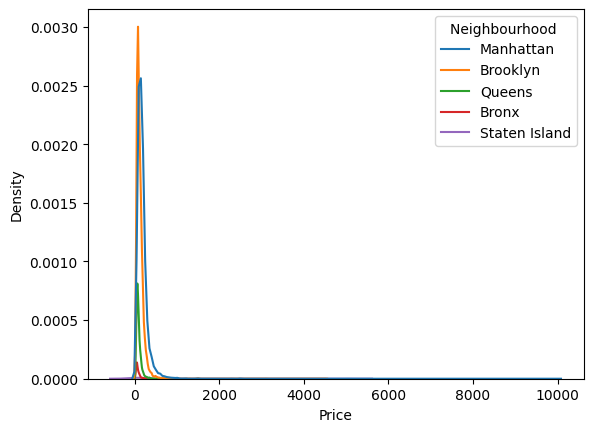

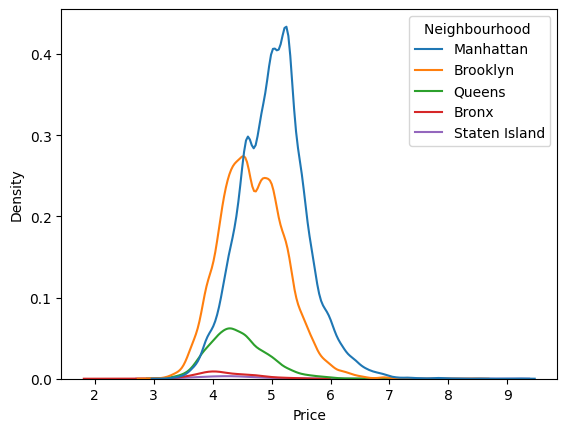

In [69]:
#1
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('./data/Q1_clean.csv')

print(df.loc[:,['Price','Neighbourhood '] ].groupby('Neighbourhood ').describe())

avg_prices_scores = df.groupby('Neighbourhood ').agg({'Price': 'mean', 'Review Scores Rating': 'mean'}).reset_index()
print(avg_prices_scores)

most_expensive_neighbourhood = avg_prices_scores.loc[avg_prices_scores['Price'].idxmax()]
print(f"The most expensive neighbourhood is {most_expensive_neighbourhood['Neighbourhood ']} with an average price of {most_expensive_neighbourhood['Price']:.2f}")

sns.kdeplot(x=df['Price'], hue=df['Neighbourhood '])
plt.show()

sns.kdeplot(x=np.log(df['Price']), hue=df['Neighbourhood '])
plt.show()



In [71]:
#2
from sklearn import linear_model
y = df['Price']
X = pd.get_dummies(df['Neighbourhood '], dtype='int')

reg = linear_model.LinearRegression(fit_intercept=False).fit(X,y)

res = pd.DataFrame({'variable':reg.feature_names_in_, 'coefficient': reg.coef_})
res

,variable,coefficient
0,Bronx,75.276498
1,Brooklyn,127.747378
2,Manhattan,183.664286
3,Queens,96.857233
4,Staten Island,146.166667


The coefficients of regression on the neighbourhood dummy are the same as part 1. Regression is calculating the group averages without control variables and regression coefficients for dummy variables represent group means with the other factors. When you regress price on Neighbourhood using dummy variables without an intercept, the coefficients represent the average price difference for each borough relative to the reference group (the Bronx, in this case). The pattern in the coefficients shows how much more or less expensive properties are in each borough compared to the Bronx. These coefficients capture the effect of the borough on price, with the Bronx being the baseline.


In [73]:
#3
y = df['Price']
X = pd.get_dummies(df['Neighbourhood '], dtype='int', drop_first = True)

reg = linear_model.LinearRegression().fit(X,y)

res = pd.DataFrame({'variable':reg.feature_names_in_, 'coefficient': reg.coef_})
print(res)

print(reg.intercept_)

res = pd.DataFrame({'variable':reg.feature_names_in_, 
                        'coefficient': reg.coef_+reg.intercept_})
print(res)



        variable  coefficient
0       Brooklyn    52.470881
1      Manhattan   108.387789
2         Queens    21.580735
3  Staten Island    70.890169
75.27649769584711
        variable  coefficient
0       Brooklyn   127.747378
1      Manhattan   183.664286
2         Queens    96.857233
3  Staten Island   146.166667


When you include an intercept in the regression, the intercept represents the average price in the reference category (the Bronx). The coefficients for other neighbourhoods show the difference in price compared to the Bronx. To get the coefficients from part 2, you would add the intercept to the coefficients from part 2, since the regression with the intercept gives the overall price for the reference category plus the difference for each neighbourhood.

In [91]:
#4
from sklearn import linear_model
from sklearn.model_selection import train_test_split

y = df['Price']
X = df.loc[:,['Review Scores Rating', 'Neighbourhood '] ]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.2, random_state=100)

Z_train = pd.concat([X_train['Review Scores Rating'], pd.get_dummies(X_train['Neighbourhood '], dtype='int')], axis = 1)
Z_test = pd.concat([X_test['Review Scores Rating'], pd.get_dummies(X_test['Neighbourhood '], dtype='int')], axis = 1)

reg = linear_model.LinearRegression(fit_intercept=False).fit(Z_train,y_train)

y_hat = reg.predict(Z_test)
print('R^2: ', reg.score(Z_test,y_test))
rmse = np.sqrt( np.mean( (y_test - y_hat)**2 ))
print('RMSE: ', rmse)

res = pd.DataFrame({'variable':reg.feature_names_in_, 'coefficient': reg.coef_})
print(res)


manhattan_coeff = res.loc[res['variable'] == 'Manhattan', 'coefficient'].values[0]
review_score_coeff = res.loc[res['variable'] == 'Review Scores Rating', 'coefficient'].values[0]
price = manhattan_coeff + (review_score_coeff * 100)
print(f"The most expensive property (100 rating) you can rent is a place in Manhattan, for about {price:.2f} per night.")


R^2:  0.06701086106947252
RMSE:  125.01092061382934
               variable  coefficient
0  Review Scores Rating     1.032257
1                 Bronx   -17.261392
2              Brooklyn    32.180888
3             Manhattan    89.421020
4                Queens     4.050208
5         Staten Island    61.576393
The most expensive property (100 rating) you can rent is a place in Manhattan, for about 192.65 per night.


In [92]:
#5
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

y = df['Price']
X = df.loc[:,['Review Scores Rating', 'Neighbourhood ', 'Room Type'] ]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.2, random_state=100)

Z_train = pd.concat([X_train['Review Scores Rating'], pd.get_dummies(X_train['Neighbourhood '], dtype='int'), pd.get_dummies(X_train['Room Type'], dtype='int')], axis = 1)
Z_test = pd.concat([X_test['Review Scores Rating'], pd.get_dummies(X_test['Neighbourhood '], dtype='int'), pd.get_dummies(X_test['Room Type'], dtype='int')], axis = 1)

reg = linear_model.LinearRegression(fit_intercept=False).fit(Z_train,y_train)
y_hat = reg.predict(Z_test)
print('R^2: ', reg.score(Z_test,y_test))
rmse = np.sqrt( np.mean( (y_test - y_hat)**2 ))
print('RMSE: ', rmse)
res = pd.DataFrame({'variable':reg.feature_names_in_, 'coefficient': reg.coef_})
print(res)


manhattan_coeff = res.loc[res['variable'] == 'Manhattan', 'coefficient'].values[0]
room_type_coeff = res.loc[res['variable'] == 'Entire home/apt', 'coefficient'].values[0]
review_score_coeff = res.loc[res['variable'] == 'Review Scores Rating', 'coefficient'].values[0]
price = manhattan_coeff + room_type_coeff + (review_score_coeff * 100)
print(f"Most expensive is entire home/apt (100 rating) in Manhattan and would cost: ${price:.2f} per night.")




R^2:  0.2203534812928234
RMSE:  114.27692123130632
               variable  coefficient
0  Review Scores Rating     0.626912
1                 Bronx   -13.022765
2              Brooklyn    10.378456
3             Manhattan    53.693304
4                Queens    -6.833330
5         Staten Island    50.003022
6       Entire home/apt   110.617820
7          Private room     3.101341
8           Shared room   -19.500474
Most expensive is entire home/apt (100 rating) in Manhattan and would cost: $227.00 per night.


6.) The change in the coefficient on Review Scores Rating from Part 4 to Part 5 occurs because, in Part 5, you're controlling for Room Type. By adding Room Type as an additional predictor, the effect of Review Scores Rating on Price is now measured while accounting for variations in price due to different room types. Essentially, the coefficient for Review Scores Rating in Part 5 reflects the impact of review scores on price after adjusting for the type of property being rented, which wasn't accounted for in Part 4.

**Q3.** This question is a case study for linear models. The data are about car prices. In particular, they include:

  - `Price`, `Color`, `Seating_Capacity`
  - `Body_Type`: crossover, hatchback, muv, sedan, suv
  - `Make`, `Make_Year`: The brand of car and year produced
  - `Mileage_Run`: The number of miles on the odometer
  - `Fuel_Type`: Diesel or gasoline/petrol
  - `Transmission`, `Transmission_Type`:  speeds and automatic/manual

  1. Load `cars_hw.csv`. These data were really dirty, and I've already cleaned them a significant amount in terms of missing values and other issues, but some issues remain (e.g. outliers, badly scaled variables that require a log or arcsinh transformation). Clean the data however you think is most appropriate.
  2. Summarize the `Price` variable and create a kernel density plot. Use `.groupby()` and `.describe()` to summarize prices by brand (`Make`). Make a grouped kernel density plot by `Make`. Which car brands are the most expensive? What do prices look like in general?
  3. Split the data into an 80% training set and a 20% testing set.
  4. Make a model where you regress price on the numeric variables alone; what is the $R^2$ and `RMSE` on the training set and test set? Make a second model where, for the categorical variables, you regress price on a model comprised of one-hot encoded regressors/features alone (you can use `pd.get_dummies()`; be careful of the dummy variable trap); what is the $R^2$ and `RMSE` on the test set? Which model performs better on the test set? Make a third model that combines all the regressors from the previous two; what is the $R^2$ and `RMSE` on the test set? Does the joint model perform better or worse, and by home much?
  5. Use the `PolynomialFeatures` function from `sklearn` to expand the set of numerical variables you're using in the regression. As you increase the degree of the expansion, how do the $R^2$ and `RMSE` change? At what point does $R^2$ go negative on the test set? For your best model with expanded features, what is the $R^2$ and `RMSE`? How does it compare to your best model from part 4?
  6. For your best model so far, determine the predicted values for the test data and plot them against the true values. Do the predicted values and true values roughly line up along the diagonal, or not? Compute the residuals/errors for the test data and create a kernel density plot. Do the residuals look roughly bell-shaped around zero? Evaluate the strengths and weaknesses of your model.

**Q4.** This question refers to the `heart_hw.csv` data. It contains three variables:

  - `y`: Whether the individual survived for three years, coded 0 for death and 1 for survival
  - `age`: Patient's age
  - `transplant`: `control` for not receiving a transplant and `treatment` for receiving a transplant

Since a heart transplant is a dangerous operation and even people who successfully get heart transplants might suffer later complications, we want to look at whether a group of transplant recipients tends to survive longer than a comparison group who does not get the procedure.

1. Compute (a) the proportion of people who survive in the control group who do not receive a transplant, and (b) the difference between the proportion of people who survive in the treatment group and the proportion of people who survive in the control group. In a randomized controlled trial, this is called the **average treatment effect**.
2. Regress `y` on `transplant` using a linear model with a constant. How does the constant/intercept of the regression and the coefficient on transplant compare to your answers from part 1? Explain the relationship clearly.
3. We'd like to include `age` in the regression, since it's reasonable to expect that older patients are less likely to survive an extensive surgery like a heart transplant. Regress `y` on a constant, transplant, and age. How does the intercept change?
4. Build a more flexible model that allows for non-linear age effects and interactions between age and treatment. Use a train-test split to validate your model. Estimate your best model, predict the survival probability by age, and plot your results conditional on receiving a transplant and not. Describe what you see.
5. Imagine someone suggests using these kinds of models to select who receives organ transplants; perhaps the CDC or NIH starts using a scoring algorithm to decide who is contacted about a potential organ. What are your concerns about how it is built and how it is deployed?

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

data = pd.read_csv("./data/heart_hw.csv")
data["transplant"] = data["transplant"].map({"control": 0, "treatment": 1})

# 1a & 1b
treatment_survival = np.mean(data.loc[data["transplant"] == 1, "y"])
control_survival = np.mean(data.loc[data["transplant"] == 0, "y"])
ate = treatment_survival - control_survival

print(f"Survival rate in control group: {control_survival:.4f}")
print(f"Average Treatment Effect (ATE): {ate:.4f}")

Survival rate in control group: 0.1176
Average Treatment Effect (ATE): 0.2302


In [6]:
# 2: Regress y on transplant
X = data[["transplant"]]
y = data["y"]
model1 = LinearRegression().fit(X, y)
print(f"Intercept: {model1.intercept_}")
print(f"Coefficient on transplant: {model1.coef_[0]}")


Intercept: 0.11764705882352966
Coefficient on transplant: 0.23017902813299193


The intercept in the regression of y on transplant (0.1176) represents the survival rate for the control group, which matches your computed survival rate. The coefficient on transplant (0.2302) represents the difference in survival probability between the treatment and control groups, which is exactly the ATE you calculated earlier. This confirms that in a simple regression of survival (y) on transplant, the intercept is the control group survival rate, and the coefficient is the ATE.

In [7]:
# 3: Regress y on transplant and age
X2 = data[["transplant", "age"]]
model2 = LinearRegression().fit(X2, y)
print(f"Intercept: {model2.intercept_}")
print(f"Coefficients: {model2.coef_}")

Intercept: 0.701956972174095
Coefficients: [ 0.26470169 -0.01360722]


The new regression includes age alongside transplant, and the intercept changed from 0.1176 to 0.7020. The coefficient on transplant changed from 0.2302 to 0.2647, meaning that controlling for age slightly increases the estimated effect of a transplant. The coefficient on age (-0.0136) suggests that older patients have lower survival probabilities, which makes sense because aging is associated with worse health outcomes.

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


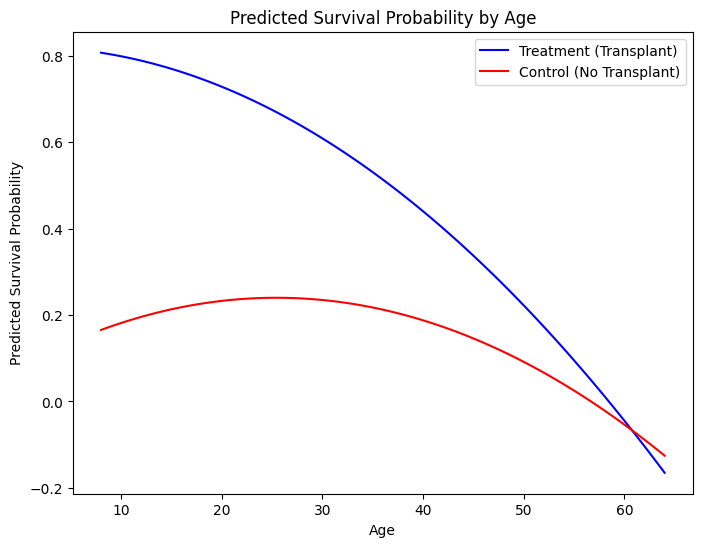

In [8]:
# 4: Train-test split
data_train, data_test = train_test_split(data, test_size=0.2, random_state=42)

# Polynomial features for age
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(data_train[["age"]])
X_test_poly = poly.transform(data_test[["age"]])

# Interaction term: age * transplant
X_train_poly = np.column_stack((X_train_poly, data_train["transplant"], data_train["transplant"] * data_train["age"]))
X_test_poly = np.column_stack((X_test_poly, data_test["transplant"], data_test["transplant"] * data_test["age"]))

# Fit linear regression model
model3 = LinearRegression()
model3.fit(X_train_poly, data_train["y"])

# Predict survival probabilities
data_test["predicted_survival"] = model3.predict(X_test_poly)

# Plot survival probability by age
age_range = np.linspace(data["age"].min(), data["age"].max(), 100)
age_poly = poly.transform(age_range.reshape(-1, 1))
treatment_effect = model3.predict(np.column_stack((age_poly, np.ones_like(age_range), age_range)))
control_effect = model3.predict(np.column_stack((age_poly, np.zeros_like(age_range), np.zeros_like(age_range))))

plt.figure(figsize=(8, 6))
plt.plot(age_range, treatment_effect, label="Treatment (Transplant)", color="blue")
plt.plot(age_range, control_effect, label="Control (No Transplant)", color="red")
plt.xlabel("Age")
plt.ylabel("Predicted Survival Probability")
plt.legend()
plt.title("Predicted Survival Probability by Age")
plt.show()

From the graph, the blue line (transplant) shows a higher survival probability for younger patients, but it declines sharply with age. The red line (control) remains low but slightly increases at younger ages before declining again. Around age 60, the survival probability for both groups converges, suggesting transplants are less effective for older patients. This aligns with the intuition that older individuals may not benefit from transplants as much due to increased risks and complications.

5.) Ethical concerns include bias in selection (if the model is trained on historical data, it may reflect past biases in organ allocation, disadvantaging certain groups), transparency (patients and doctors need to understand the model’s decisions to trust its recommendations), fairness (the model must be tested to ensure it does not discriminate based on race, socioeconomic status, or other protected factors), dynamic adaptation (if the model isn’t updated regularly, it may fail to account for medical advancements), and accountability (who is responsible if a model-based decision leads to preventable death?).

**Q5.** This is a question about linear regression. The outcome is whether a defendant is held pre-trial in the Virginia justice system. We would like to understand how that outcome is predicted by characteristics of the defendant, particularly race. Let's be very careful/clear: We aren't saying anyone *should* be held without bond or asserting that people with different demographic variables *should* be more likely to be held, but instead trying to predict whether people with different characteristics *are empirically more likely* to be held without bond, given the available information. This is the first step we would take in investigating whether a system is fair, or how large the disparities are: Does it treat people with similar observable characteristics similarly, or not? We are going to look at a common question: Are Black defendants treated differently from white or Asian ones? (There are Native American defendants, but there are 11 in total, which is such a small number of observations that is difficult to clearly say anything about how this group is treated relative to the others.)

The variables in the data are:

  - `held_wo_bail`: Whether a defendant is held without bail before trial (Boolean logical)
  - `race`, `sex`: Categorical demographic variables
  - `is_poor`: Whether the defendant is classified as indigent
  - `prior_F`, `prior_M`: The number of prior felony and misdemeanor arrests
  - `case_type`: A categorical variable indicating a misdemeanor `M` or felony `F` or infraction `I` or special case `S`
  - `age`: Defendant's age
  - `bond`, `bond_NA`, `bond_type`: The amount of any bond, whether it is missing, and the type
  - `sentence`, `sentence_NA`, `sentence_type`: The length of any sentence, whether it is missing, and the type

1. Load the `pretrial_data.csv` data. Notice that there are `nan`s, but the data are relatively clean. Because there are `.nan`s among variables you won't use, you'll want to narrow down your analysis to the relevant variables before dropping or imputing missing values.
2. Create a dummy variable indicating that the defendant is Black.
3. Regress `held` on `Black`. What is the slope coefficient Interpret the coefficient on the Black dummy variable: How much more likely is a black person to be held without bail? What is the $R^2$ of the model?
4. Before doing this question, please think for a few minutes about how to make the process of running the following regressions as efficient as possible, before jumping into writing code. Repeat part 2, for the following specifications, keeping track of the coefficient on the Black dummy variable each time:
      - `held` on `Black` and `sex`
      - `held` on `Black` and `sex` and `is_poor`
      - `held` on `Black` and `sex` and `is_poor` and `prior_F`
      - `held` on `Black` and `sex` and `is_poor` and `prior_F` and `case_type`
What happens to the coefficient on the Black dummy variable as you include more regressors/features/controls in the regression? Explain your findings.
5. Suppose we don't want to see just `Black` and `sex`, but `Black` interacted with `sex`: Are Black men and Black women treated systemically differently from the rest of the population? Implement this in a regression, and explain your findings.
6. Imagine someone argued we should use these kinds of models to help a judge or magistrate make bail decisions (you could obviously go back and make this kind of model for the bond and sentence variables, then deploy it on new cases to predict what their bond and sentence values would be). What concerns would you have? Do you think society should be using data-driven and automated tools like that? Explain your concerns clearly.

6.) Using data-driven models like linear regression for decisions such as bail raises significant ethical concerns. First, the model might perpetuate existing biases if the data reflects historical inequalities, potentially leading to unfair treatment of certain groups, particularly minorities. Additionally, these models can lack transparency, making it difficult for people to understand how decisions are made. This could reduce accountability, as decisions may be viewed as automated and not subject to human scrutiny. Finally, fairness is a major concern, as models might inadvertently favor or disadvantage specific demographic groups, further entrenching societal disparities. Therefore, while automation can improve efficiency, it is crucial to ensure fairness, transparency, and accountability in using such tools for high-stakes decisions.

**Q6.** Let's explore multiple linear regression in a two-variable case, to build more intuition about what is happening.

Suppose the model is 
$$
\hat{y}_i = b_0 + b_1 z_{i1} + b_2 z_{i2}
$$
Assume that $z_{ij}$ is centered or de-meaned, so that $z_{ij} = x_{ij} - m_j$ where $m_j$ is the mean of variable $j$ and $x_{ij}$ is the original value of variable $j$ for observation $i$. Notice that this implies
$$
\dfrac{1}{N} \sum_{i=1}^N z_{ij} = 0
$$
which will simplify your calculations below substantially!

1. Write down the SSE for this model.
2. Take partial derivatives with respect to $b_0$, $b_1$, and $b_2$.
3. Verify that the average error is zero and $e \cdot z =0$ at the optimum, just as in the single linear regression case.
4. Show that the optimal intercept is $b_0^* = \bar{y}$. Eliminate $b_0^*$ from the remaining equations, and focus on $b_1$ and $b_2$.
5. Write your results as a matrix equation in the form "$Ab=C$". These are called the **normal equations**.
6. Divide both sides by $N$ and substitute $z_{ij} = x_{ij} - m_j$ back into your normal equations for $x_{ij}$. What is the matrix $A$? What is the vector $C$? Explain the intuition of your discovery.

**Q7.** In class, we showed that for the single linear regression model,
\begin{alignat*}{3}
a^* &=& \bar{y} \\
b^* &=& \dfrac{\sum_{i=1}^N(y_i - \bar{y})(x_i-\bar{x})}{\sum_{i=1}^N (x_i-\bar{x})^2},
\end{alignat*}

1. When will $b^*$ be large or small, depending on the relationship between $X$ and $Y$ and the variance of $X$?
2. Suppose you have measurement error in $X$ which artificially inflates its variance (e.g. bad data cleaning). We'll model this as saying the "real" value of $X$ for observation $i$ is $z_i$, but we observe $x_i = z_i + n_i$, where $n_i$ is the added noise. Does this affect the intercept of the regression? What happens to the $b^*$ coefficient relative to a noise-less model? How will affect your ability to predict? (This phenomenon is called **attenuation**.) 
3. Suppose the noise $n_i$ is independent of $z_i$ and $y_i$, so that (approximately)
$$
\dfrac{1}{N} \sum_{i=1}^N (y_i - \bar{y})(n_i - \bar{n}) =0, \quad \dfrac{1}{N} \sum_{i=1}^N (z_i - \bar{z})(n_i - \bar{n}) =0.
$$
and that the mean of the bias is zero, so that
$$
\dfrac{1}{N} \sum_{i=1}^N n_i = 0.
$$
In this case, the noise $n_i$ is zero on average and independent of the values of $x_i$ and $y_i$: It's just measurement error or lazy data cleaning.
Explain the intuition of your result. 

4. How does attenuation factor into the cost-benefit analysis of gathering higher quality data or cleaning it more carefully?

**Q8.**
1. Find a dataset on a topic you're interested in. Some easy options are data.gov, kaggle.com, and data.world.
2. Clean the data and do some exploratory data analysis on key variables that interest you. Pick a particular target/outcome variable and features/predictors.
3. Split the sample into an ~80% training set and a ~20% test set.
4. Run a few regressions of your target/outcome variable on a variety of features/predictors. Compute the SSE on the test set.
5. Which model performed the best, and why?
6. What did you learn?

**Q9.** There is a folder called `heart_failure` which contains reasonably detailed health data on patients and whether they die of congestive heart failure. 

1. Load the data and perform an 80/20-train/test split.
2. Using dummy/one-hot-encoded variables and transformations of the numeric features, build the best model you can. **But**, do not delete code chunks or revise your work substantially as you experiment. Just keep moving forward with your ideas and experiments.
3. When you're done, scroll through your notebook. What worked and what didn't? Does your code have intention, or are you randomly experimenting? If you had to do this again, what might you do differently to get to a good model faster?


**Q10.** Let's look at a cousin of Linear Regression, called **kernel regression** or **local constant least squares** or **Nadaraya-Watson Estimator**.

We derived the OLS estimator for single linear regression by minimizing
$$
SSE(b_0, b_1) = \frac{1}{N}\sum_{i=1}^N (y_i - b_0 - b_1 x_i)^2
$$
with solution
$$
\hat{b}_0 = \bar{y} - \hat{b}_1 \bar{x}, \quad \hat{b}_1 = \dfrac{\frac{1}{N} \sum_{i=1}^N (x_i-\bar{x})(y_i - \bar{y})}{s_x^2}.
$$

When you step back and think about it, this is a bit weird: The algorithm is computing sample means, variances, and covariances, and using those to create a predictive model. The data themselves arguably vanish from the solution. This is elegant, this is strange.

Instead, let $k(z)$ be a kernel function, such as the Gaussian
$$
k(z) = \frac{1}{\sqrt{2\pi}} e^{-z^2/2}
$$
or uniform
$$
k(z) = \begin{cases}
1/2, & |z| \le \frac{1}{2}\\
0, & \text{otherwise.}
\end{cases}
$$
We'll instead minimize, or each predictor value $x$,
$$
SSE(\hat{y}(x)) = \dfrac{1}{N} \sum_{i=1}^N \left\lbrace y_i - \hat{y}(x)\right\rbrace^2 \dfrac{1}{h} k \left( \dfrac{x-x_i}{h} \right).
$$

1. Show that the optimal predictor is
$$
\hat{y}(x) = \dfrac{ \frac{1}{Nh} \sum_{i=1}^N  y_i k \left( \dfrac{x-x_i}{h} \right) }{\frac{1}{Nh} \sum_{i=1}^N k \left(  \dfrac{x-x_i}{h} \right)}
$$
This has many names, but let's call it the local constant least squares (LCLS) estimator, as opposed to ordinary least squares (OLS).

2. Compare and contrast LCLS with both OLS and $k$-Nearest Neighbor as a regression algorithm. 

3. Write a function or class that implements the LCLS estimator for a single predictor variable $x$. For a default bandwidth $h$, you can use the maximum of the Silverman plug-ins for estimating kernel densities for $X$ and $Y$:
$$
h_y = 1.06 \times s_y^{-1/5}, \quad h_x = 1.06 \times s_x^{-1/5},
$$
$$
h = \max \{ h_y, h_x \}.
$$
For the kernel, you can hard-code the uniform, Gaussian, or Epanechnikov, or make it a parameter the user can adjust with a default choice.

4. For one of the datasets available for the homework, use your LCLS estimator from part 3 to predict values $\hat{y}(x_i)$ for each datapoint $x_i$. Plot your estimator $\hat{y}$ as a line over a scatterplot of the data $\{(x_i,y_i)\}_{i=1}^N$. Tune the bandwidth until you 

5. Conceptually, how would you extend this analysis to a vector of predictors, $x = (x_1, ..., x_L)$ instead of just one explanatory variable $x$?
